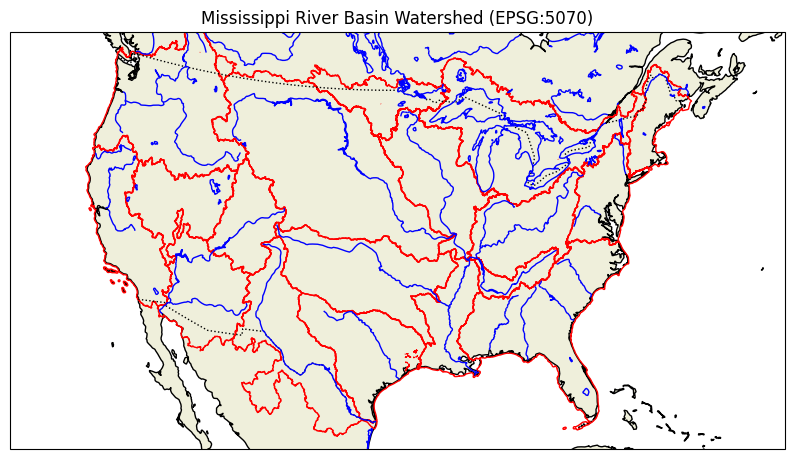

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the watershed boundary
shapefile_path = "/workspaces/mississippi_river_analysis/HUC2.shp"
watershed = gpd.read_file(shapefile_path)

# Convert to EPSG:5070 (NAD83 / Conus Albers)
watershed = watershed.to_crs(epsg=5070)

# Set up the Cartopy projection for EPSG:5070
projection = ccrs.AlbersEqualArea(central_longitude=-96, central_latitude=23, standard_parallels=(29.5, 45.5))

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': projection})

# Set the map extent to the Lower 48 U.S. states
ax.set_extent([-125, -66, 24, 50], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.LAND, edgecolor="black")
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.LAKES, edgecolor='blue', facecolor='none')
ax.add_feature(cfeature.RIVERS, edgecolor='blue')

# Plot the watershed boundary
ax.set_title("Mississippi River Basin Watershed (EPSG:5070)")
watershed.plot(ax=ax, edgecolor="red", facecolor="none", linewidth=1, transform=ccrs.epsg(5070))

# Show the plot
plt.show()


/usr/local/python/3.12.1/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/python/3.12.1/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/python/3.12.1/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/python/3.12.1/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: 

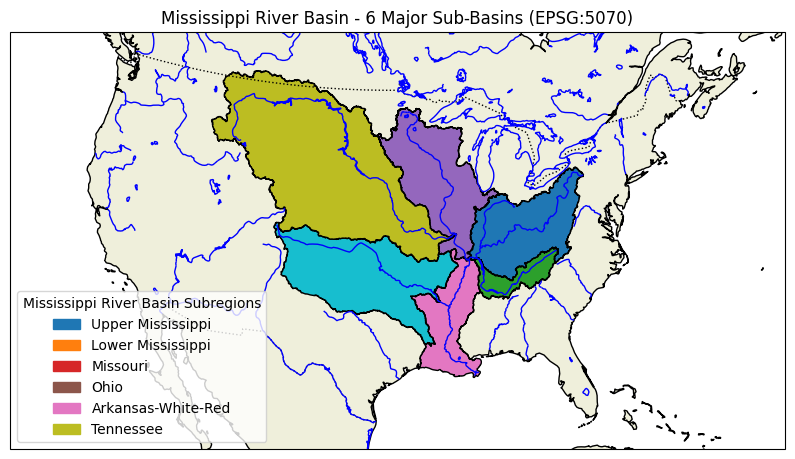

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.patches as mpatches

# Load the watershed boundary dataset
shapefile_path = "/workspaces/mississippi_river_analysis/HUC2.zip"
watershed = gpd.read_file(shapefile_path)

# Convert to EPSG:5070 (NAD83 / Conus Albers)
watershed = watershed.to_crs(epsg=5070)

# Define HUC2 codes and their corresponding basin names
basin_dict = {
    "07": "Upper Mississippi",
    "08": "Lower Mississippi",
    "10": "Missouri",
    "05": "Ohio",
    "11": "Arkansas-White-Red",
    "06": "Tennessee"
}

# Filter the dataset for the selected sub-basins
mississippi_watershed = watershed[watershed["HUC2"].isin(basin_dict.keys())]

# Create a new column for readable basin names
mississippi_watershed["Basin Name"] = mississippi_watershed["HUC2"].map(basin_dict)

# Set up the Cartopy projection for EPSG:5070
projection = ccrs.AlbersEqualArea(central_longitude=-96, central_latitude=23, standard_parallels=(29.5, 45.5))

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': projection})

# Set the map extent to the Lower 48 U.S. states
ax.set_extent([-125, -66, 24, 50], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.LAND, edgecolor="black")
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.LAKES, edgecolor='blue', facecolor='none')
ax.add_feature(cfeature.RIVERS, edgecolor='blue')

# Plot the 6 sub-basins with different colors
cmap = "tab10"
mississippi_watershed.plot(ax=ax, column="HUC2", cmap=cmap, edgecolor="black", legend=False, transform=ccrs.epsg(5070))

# Create custom legend
patches = [mpatches.Patch(color=plt.cm.get_cmap(cmap)(i / len(basin_dict)), label=name) 
           for i, name in enumerate(basin_dict.values())]
ax.legend(handles=patches, loc="lower left", title="Mississippi River Basin Subregions")

# Add title
ax.set_title("Mississippi River Basin - 6 Major Sub-Basins (EPSG:5070)")

# Show plot
plt.show()


/usr/local/python/3.12.1/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/tmp/ipykernel_19022/3172476959.py:111: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  basin_patches = [mpatches.Patch(color=plt.cm.get_cmap(cmap)(i / len(basin_dict)), label=name)
/tmp/ipykernel_19022/3172476959.py:188: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/usr/local/python/3.12.1/lib/python3.12/site-packages/cartop

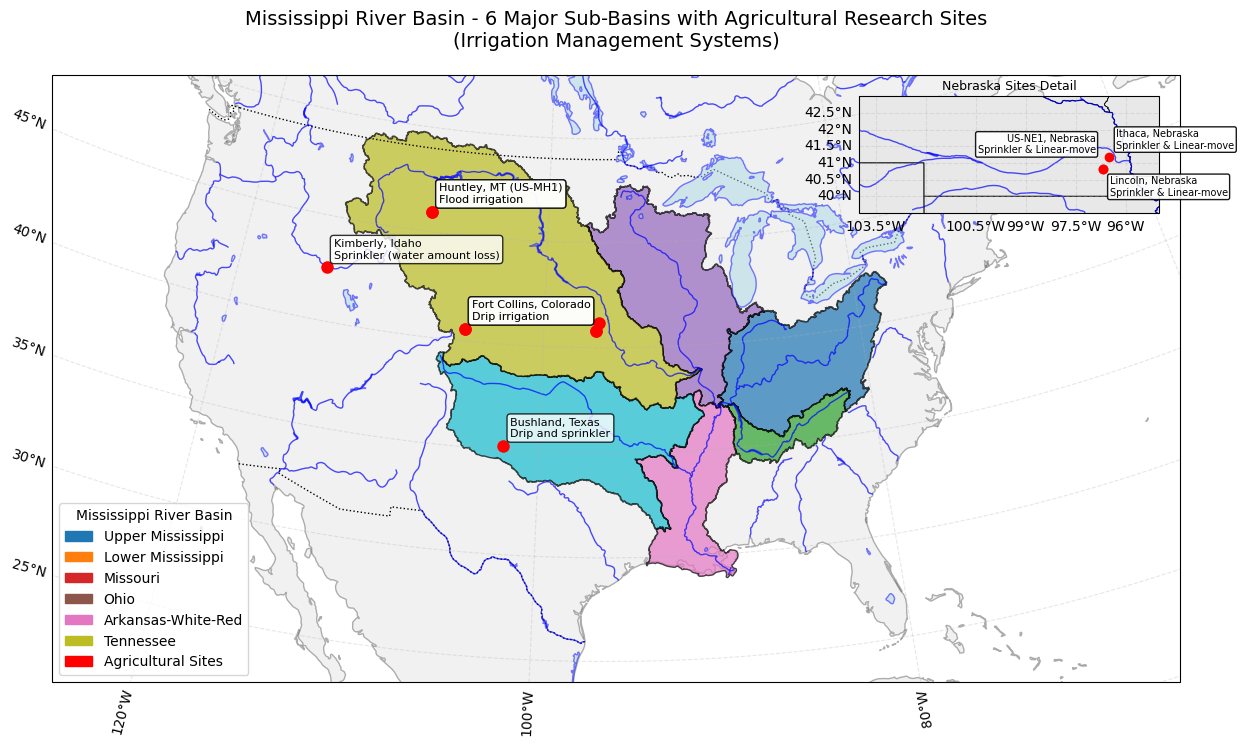

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.patches as mpatches
import pandas as pd

# Load the watershed boundary dataset
shapefile_path = "/workspaces/mississippi_river_analysis/HUC2.zip"
watershed = gpd.read_file(shapefile_path)

# Convert to EPSG:5070 (NAD83 / Conus Albers)
watershed = watershed.to_crs(epsg=5070)

# Define HUC2 codes and their corresponding basin names
basin_dict = {
    "07": "Upper Mississippi",
    "08": "Lower Mississippi",
    "10": "Missouri",
    "05": "Ohio",
    "11": "Arkansas-White-Red",
    "06": "Tennessee"
}

# Filter the dataset for the selected sub-basins
mississippi_watershed = watershed[watershed["HUC2"].isin(basin_dict.keys())]

# Create a new column for readable basin names
mississippi_watershed["Basin Name"] = mississippi_watershed["HUC2"].map(basin_dict)

# Define site locations and irrigation types
sites_data = {
    'Location': ['Kimberly, ID', 'Lincoln, NE', 'Ithaca, NE', 'Bushland, TX', 
                 'US-NE1', 'Fort Collins, CO', 'Fort Collins, CO', 'Huntley, MT (US-MH2)', 'Huntley, MT (US-MH1)'],
    'Longitude': [-114.3633, -96.6917, -96.4917, -102.0947, 
                  -96.6917, -105.0178, -105.0178, -108.0064, -108.0064],
    'Latitude': [42.5347, 40.8136, 41.1667, 35.1869, 
                 40.8136, 40.5853, 40.5853, 45.9547, 45.9547],
    'Irrigation_Type': ['Sprinkler (water amount loss)', 'Sprinkler & Linear-move', 'Sprinkler & Linear-move', 'Drip and sprinkler', 
                        'Sprinkler & Linear-move', 'Drip irrigation', 'Drip irrigation', 'Flood irrigation', 'Flood irrigation']
}

sites_df = pd.DataFrame(sites_data)

# Set up the Cartopy projection for EPSG:5070
projection = ccrs.AlbersEqualArea(central_longitude=-96, central_latitude=23, standard_parallels=(29.5, 45.5))

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': projection})

# Set the map extent to the Lower 48 U.S. states
ax.set_extent([-125, -66, 24, 50], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.LAND, edgecolor="black", facecolor='lightgray', alpha=0.3)
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.LAKES, edgecolor='blue', facecolor='lightblue', alpha=0.5)
ax.add_feature(cfeature.RIVERS, edgecolor='blue', alpha=0.7)

# Plot the 6 sub-basins with different colors
cmap = "tab10"
mississippi_watershed.plot(ax=ax, column="HUC2", cmap=cmap, edgecolor="black", 
                          legend=False, transform=ccrs.epsg(5070), alpha=0.7)

# Add site points
for idx, row in sites_df.iterrows():
    # Plot the point
    ax.plot(row['Longitude'], row['Latitude'], 'ro', markersize=8, 
            transform=ccrs.PlateCarree(), zorder=5)
    
    # Add annotation with location and irrigation type
    location_parts = row['Location'].split(',')
    city_name = location_parts[0].strip()
    state_abbrev = location_parts[1].strip() if len(location_parts) > 1 else ""
    
    # Convert state abbreviations to full names
    state_names = {
        'ID': 'Idaho', 'NE': 'Nebraska', 'TX': 'Texas', 
        'CO': 'Colorado', 'MT': 'Montana'
    }
    
    if state_abbrev in state_names:
        location_display = f"{city_name}, {state_names[state_abbrev]}"
    else:
        location_display = row['Location']
    
    irrigation_info = row['Irrigation_Type']
    
    # Create annotation text
    annotation_text = f"{location_display}\n{irrigation_info}"
    
    # Add text annotation with background box for better readability
    # Skip Nebraska sites for main map - they'll be shown in inset
    if 'NE' in row['Location'] or 'US-NE1' in row['Location']:
        continue
        
    offset_x, offset_y = 5, 5     # Default offset for non-NE sites
    
    ax.annotate(annotation_text, 
                xy=(row['Longitude'], row['Latitude']), 
                xytext=(offset_x, offset_y), 
                textcoords='offset points',
                transform=ccrs.PlateCarree(),
                fontsize=8,
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8),
                ha='left',
                va='bottom',
                zorder=6)

# Create custom legend for basins
basin_patches = [mpatches.Patch(color=plt.cm.get_cmap(cmap)(i / len(basin_dict)), label=name) 
                 for i, name in enumerate(basin_dict.values())]

# Add site legend
site_patch = mpatches.Patch(color='red', label='Agricultural Sites')
all_patches = basin_patches + [site_patch]

ax.legend(handles=all_patches, loc="lower left", title="Mississippi River Basin")

# Add title
ax.set_title("Mississippi River Basin - 6 Major Sub-Basins with Agricultural Research Sites\n(Irrigation Management Systems)", 
             fontsize=14, pad=20)

# Add gridlines for reference
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, 
                  alpha=0.3, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Create inset map for Nebraska sites using subplot approach with cartopy
inset_ax = fig.add_axes([0.72, 0.65, 0.25, 0.25], projection=ccrs.PlateCarree())

# Set Nebraska extent
nebraska_extent = [-104, -95, 39.5, 43]
inset_ax.set_extent(nebraska_extent, crs=ccrs.PlateCarree())

# Add cartopy features to inset
inset_ax.add_feature(cfeature.LAND, edgecolor="black", facecolor='lightgray', alpha=0.5)
inset_ax.add_feature(cfeature.BORDERS, linestyle=":")
inset_ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=0.5)
inset_ax.add_feature(cfeature.LAKES, edgecolor='blue', facecolor='lightblue', alpha=0.7)
inset_ax.add_feature(cfeature.RIVERS, edgecolor='blue', alpha=0.7)

# Add Nebraska sites to inset
ne_sites = sites_df[sites_df['Location'].str.contains('NE|US-NE1')]
for idx, row in ne_sites.iterrows():
    # Plot point
    inset_ax.plot(row['Longitude'], row['Latitude'], 'ro', markersize=6, 
                  transform=ccrs.PlateCarree(), zorder=5)
    
    # Create clean annotation
    location_parts = row['Location'].split(',')
    city_name = location_parts[0].strip()
    if 'US-NE1' in city_name:
        city_name = 'US-NE1'
    
    irrigation_info = row['Irrigation_Type']
    annotation_text = f"{city_name}, Nebraska\n{irrigation_info}"
    
    # Position annotations to avoid overlap
    if 'US-NE1' in row['Location']:
        offset_x, offset_y = -5, 10
        ha, va = 'right', 'bottom'
    elif 'Lincoln' in row['Location']:
        offset_x, offset_y = 5, -5
        ha, va = 'left', 'top'
    else:  # Ithaca
        offset_x, offset_y = 5, 5
        ha, va = 'left', 'bottom'
    
    inset_ax.annotate(annotation_text, 
                     xy=(row['Longitude'], row['Latitude']), 
                     xytext=(offset_x, offset_y), 
                     textcoords='offset points',
                     transform=ccrs.PlateCarree(),
                     fontsize=7,
                     bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.9),
                     ha=ha, va=va, zorder=6)

# Style the inset
inset_ax.set_title('Nebraska Sites Detail', fontsize=9, pad=5)
inset_gl = inset_ax.gridlines(draw_labels=True, alpha=0.3, linestyle='--')
inset_gl.top_labels = False
inset_gl.right_labels = False
inset_ax.tick_params(labelsize=6)

# Show plot
plt.tight_layout()
plt.show()